<a href="https://colab.research.google.com/github/ChristopherSTAN/Kaggle/blob/master/tao_United_proStates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ChristopherSTAN/Kaggle.git

Cloning into 'Kaggle'...


In [3]:
!git config --global user.email 497592613@qq.com

In [5]:
!echo "# Kaggle" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git remote add origin https://github.com/ChristopherSTAN/Kaggle.git
!git push -u origin master

Reinitialized existing Git repository in /content/.git/
[master b2cd339] first commit
 1 file changed, 1 insertion(+)
fatal: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


没用但是不能删

In [ ]:
# import os
# if not os.path.exists("Kaggle"):
#     os.makedirs("Kaggle")
# import shutil
# shutil.copy("/content/drive/My Drive/kaggle.json", "/content/Kaggle/kaggle.json")
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/Kaggle"
# %cd /content/Kaggle
# !kaggle competitions files prostate-cancer-grade-assessment
# !kaggle competitions download prostate-cancer-grade-assessment
# !kaggle competitions download prostate-cancer-grade-assessment -f train_label_masks/004391d48d58b18156f811087cd38abf_mask.tiff
# !kaggle competitions download prostate-cancer-grade-assexssment -f train_images/004391d48d58b18156f811087cd38abf.tiff
# !unzip 004391d48d58b18156f811087cd38abf_mask.tiff.zip
# !unzip 004391d48d58b18156f811087cd38abf.tiff.zip
# !kaggle competitions download prostate-cancer-grade-assessment -f train.csv
# %cd ..

开始有用了

运行之后要重启！！！！


In [ ]:
# !pip install imagecodecs

装kaggle api

In [ ]:
!mkdir ~/.kaggle
!cp "/content/drive/My Drive/kaggle.json" ~/.kaggle/kaggle.json

In [ ]:
import kaggle
kaggle.api.authenticate()
kaggle.api.competition_download_file(competition='prostate-cancer-grade-assessment',
                                     file_name='train.csv',
                                     path='/content/')

100%|██████████| 508k/508k [00:00<00:00, 85.6MB/s]

能找到的图就这么多

In [ ]:
filenames = ["0032bfa835ce0f43a92ae0bbab6871cb",
             "0076bcb66e46fb485f5ba432b9a1fe8a",
             "004f6b3a66189b4e88b6a01ba19d7d31",
             "007433133235efc27a39f11df6940829",
             "006f4d8d3556dd21f6424202c2d294a9",
             "004391d48d58b18156f811087cd38abf",
             "006f6aa35a78965c92fffd1fbd53a058",
             "003d4dd6bd61221ebc0bfb9350db333f",
             "001d865e65ef5d2579c190a0e0350d8f",
             "000920ad0b612851f8e01bcc880d9b3d",
             "002a4db09dad406c85505a00fb6f6144",
             "003046e27c8ead3e3db155780dc5498e",
             "003a91841da04a5a31f808fb5c21538a",
             "001c62abd11fa4b57bf7a6c603a11bb9",
             "0068d4c7529e34fd4c9da863ce01a161",
             "0018ae58b01bdadc8e347995b69f99aa",
             "00412139e6b04d1e1cee8421f38f6e90",
             "0005f7aaab2800f6170c399693a96917",
             "004dd32d9cd167d9cc31c13b704498af",
             "005e66f06bce9c2e49142536caf2f6ee"]

能用的就这么多

In [ ]:
import pandas as pd
traincsv = pd.read_csv("/content/train.csv")
trainlist = []
for filename, provider in zip(traincsv['image_id'], traincsv['data_provider']):
    if provider == 'radboud' and filename in filenames:
        trainlist.append(filename)
trainlist.sort()
trainlist

['0018ae58b01bdadc8e347995b69f99aa',
 '004dd32d9cd167d9cc31c13b704498af',
 '0068d4c7529e34fd4c9da863ce01a161',
 '006f6aa35a78965c92fffd1fbd53a058',
 '007433133235efc27a39f11df6940829',
 '0076bcb66e46fb485f5ba432b9a1fe8a']

下载然后解压

In [ ]:
import os
import zipfile
if not os.path.exists("mask"):
    os.makedirs("mask")
if not os.path.exists("images"):
    os.makedirs("images")

prefixs = ['train_images/', 'train_label_masks/']
suffixs = ['.tiff', '_mask.tiff']
paths = ['images/', 'mask/']

for filename in trainlist:
    for i in [0, 1]:
        prefix = prefixs[i]
        suffix = suffixs[i]
        path = paths[i]
        kaggle.api.competition_download_file(competition='prostate-cancer-grade-assessment',
                                             file_name=prefix+filename+suffix,
                                             path='/content/'+path,
                                             quiet=True,
                                             force=True)
        try:
            with zipfile.ZipFile('/content/'+path+filename+suffix+'.zip', 'r') as zip_ref:
                zip_ref.extractall('/content/'+path)
            os.remove('/content/'+path+filename+suffix+'.zip')
        except:
            pass

In [ ]:
import cv2 as cv
import numpy as np
import skimage.io
import skimage.transform

整个例子瞅瞅

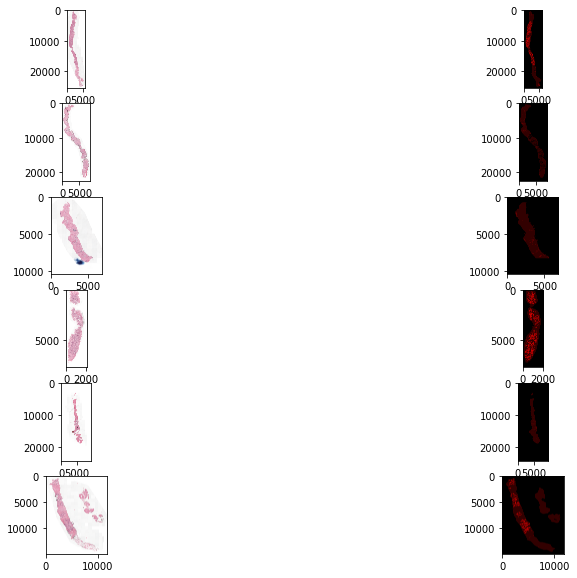

In [ ]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(6,2, figsize=(15,10))
for i, file in enumerate(trainlist):
    x = skimage.io.imread('/content/images/' + file + '.tiff')
    y = skimage.io.imread('/content/mask/' + file + '_mask.tiff')
    ax[i, 0].imshow(x)
    ax[i, 1].imshow(y*50)

In [ ]:
# !rm -r /content/gt
# !rm -r /content/im

In [ ]:
if not os.path.exists('gt'):
    os.mkdir('gt')
if not os.path.exists('im'):
    os.mkdir('im')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

整训练集

In [ ]:

HMAX = 300

# _, axes = plt.subplots(6, 2, figsize = (15, 15))

for i, filename in enumerate(trainlist):
    idcount = 0
    # read image and mask
    x = skimage.io.imread('images/' + filename + '.tiff')
    y = skimage.io.imread('mask/' + filename + '_mask.tiff')
    # down sample by 8
    x = x[::8, ::8, :]  
    y = y[::8, ::8, :]
    # find two reference points and calculate rotation angle based on them
    ptsrow, ptscol = np.where(y > 0)[0], np.where(y > 0)[1]
    minrow, maxrow = np.min(ptsrow), np.max(ptsrow)
    argminrow = np.where(ptsrow == minrow)
    argmaxrow = np.where(ptsrow == maxrow)
    mincol = np.mean(ptscol[argminrow[0]])
    maxcol = np.mean(ptscol[argmaxrow[0]])
    p1 = np.array([x.shape[0] - minrow, mincol])
    p2 = np.array([x.shape[0] - maxrow, maxcol])
    theta = 90 - np.arctan((p1[0] - p2[0]) / max(p1[1] - p2[1], 1)) * 180 / 3.141592653
    #rotate image by theta degrees
    x = skimage.transform.rotate(x, theta)
    y = skimage.transform.rotate(y, theta)
    # axes[i, 0].imshow(x)
    # axes[i, 1].imshow(y * 50)
    t = np.min(np.where(y > 0)[0])
    b = np.max(np.where(y > 0)[0])

    x = x[t:b,:,:]
    y = y[t:b,:,:]

    # axes[i, 0].imshow(x)
    # axes[i, 1].imshow(y * 50)

    for rows in range(0, x.shape[0]-HMAX, HMAX):
        if np.max(y[rows:rows+HMAX, :]) == 0:
            continue
        l = np.min(np.where(y[rows:rows+HMAX, :] > 0)[1])
        r = np.max(np.where(y[rows:rows+HMAX, :] > 0)[1])
        for cols in range(l, r, HMAX):
            xpatch = np.ones((HMAX, HMAX, 3))
            ypatch = np.zeros((HMAX, HMAX, 3))
            xtemp = x[rows:rows+HMAX, cols:cols+HMAX, :]
            ytemp = y[rows:rows+HMAX, cols:cols+HMAX, :]
            xpatch[:xtemp.shape[0], :xtemp.shape[1], :] = xtemp
            ypatch[:xtemp.shape[0], :ytemp.shape[1], :] = ytemp
            ypatch = ypatch * 255
            ypatch[ypatch > 4] = -5
            ypatch[ypatch > 3] = -4
            ypatch[ypatch > 2] = -3
            ypatch[ypatch > 1] = -2
            ypatch[ypatch > 0] = -1
            ypatch = -ypatch
    
            skimage.io.imsave('gt/'+str(i)+'_'+str(idcount)+'.png', ypatch/255)
            skimage.io.imsave('im/'+str(i)+'_'+str(idcount)+'.png', 1.0 - xpatch)
            idcount += 1


瞅瞅训练集

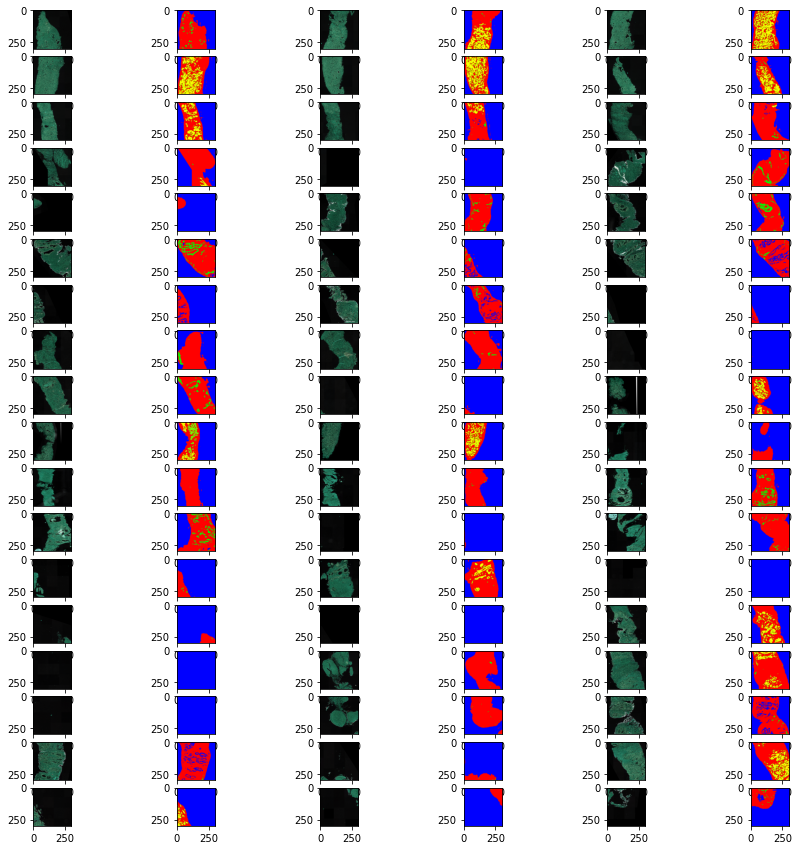

In [ ]:
ims = sorted(os.listdir('/content/im'), key=lambda x: int(x[:-4].split('_')[0]*100000+x[:-4].split('_')[1]))
gts = sorted(os.listdir('/content/gt'), key=lambda x: int(x[:-4].split('_')[0]*100000+x[:-4].split('_')[1]))

import matplotlib.pyplot as plt
_, axes = plt.subplots(len(ims)//3, 6, figsize = (15, 15))

colors = np.array([[0, 0, 255],
                   [255, 0, 0],
                   [0, 255, 0],
                   [128, 255, 0],
                   [255, 255, 0],
                   [0, 255, 255]])

for i, (imm, gtt)in enumerate(zip(ims, gts)):
    im = skimage.io.imread('/content/im/'+imm)
    gt = skimage.io.imread('/content/gt/'+gtt)
    cgt = np.zeros_like(gt)
    for j in range(0, 6):
        cgt[gt[:,:,0]==j] = colors[j,:]

    axes[i//3, 2*(i%3)+0].imshow(im)
    axes[i//3, 2*(i%3)+1].imshow(cgt)
    if i == len(ims)//3 * 3 - 1:
        break
    

整一个优乃特

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)


    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

model = UNet(n_channels=3,      # R, G, B
             n_classes=6,       # 0, 1, 2, 3, 4, 5
             bilinear=False     # use transpose conv
             )   
if torch.cuda.is_available():
    model = model.cuda() 

Trainset : Validatationset : Testset = 4 : 1 : 1

In [ ]:
import os
import random
random.seed(19872)
dataset = sorted(os.listdir('/content/im'), key=lambda x: int(x[:-4].split('_')[0])*100000+int(x[:-4].split('_')[1]))
idx = list(range(0, len(dataset)))
random.shuffle(idx)
trainidx = idx[:len(dataset)//6*4]
validx = idx[len(dataset)//6*4:len(dataset)//6*5]
testidx = idx[len(dataset)//6*5:]

print(len(trainidx))
print(len(validx))
print(len(testidx))

36
9
11


读

In [ ]:
import torchvision
import torchvision.transforms as T
from PIL import Image

def loadim(prefix, filename):
    x = Image.open('/content/' + prefix + '/' + str(filename))
    transform = T.Compose([T.ToTensor()])
    x = transform(x)
    return x

def loadgt(prefix, filename):
    x = np.array(Image.open('/content/' + prefix + '/' + str(filename)))
    x = torch.from_numpy(x[:,:,0])
    return x

逐像素预测

报告 正确预测像素 / 总像素数

In [ ]:
from math import ceil
def test(model, alldata, dataidx, batch_size):
    HMAX = 300
    model.eval()
    end = ceil(len(dataidx) / batch_size) * batch_size
    acc = 0
    for batch0 in range(0, end, batch_size):
        print('\rTest: [%d/%d] epochs' % (batch0//batch_size+1, end//batch_size), end='')
        batch1 = batch0 + batch_size if batch0 + batch_size < len(dataidx) else len(dataidx)
        batch = dataidx[batch0 : batch1]
        ims = torch.zeros((len(batch), 3, HMAX, HMAX))
        gts = torch.zeros((len(batch), HMAX, HMAX))
        for i in range(0, len(batch)):
            ims[i, :, :, :] = loadim('im', alldata[batch[i]]).unsqueeze(0)
            gts[i, :, :] = loadgt('gt', alldata[batch[i]]).unsqueeze(0)
        if torch.cuda.is_available():
            ims = ims.cuda()
            gts = gts.cuda()
        prs = torch.argmax(model(ims), dim=1)
        acc += torch.sum(gts==prs).item()
    print('\rTest: [%d/%d] epochs, acc = %.6f' % (end//batch_size, end//batch_size, acc/ len(dataidx) / HMAX / HMAX))
    return acc / len(dataidx) / HMAX / HMAX

教育瘪犊子

In [ ]:
import torch.optim as optim
from copy import deepcopy

def train(model, alldata, trainidx, validx, epochs, batch_size, lr):
    HMAX = 300
    history = {'train_loss' : [],
               'val_acc': [],}
    
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = optim.Adam(params, lr=lr)
    criterion = nn.CrossEntropyLoss()

    bestacc = 0
    for epoch in range(0, epochs):
        model.train()
        print("epoch: %d" % (epoch + 1))
        random.seed(epoch)
        random.shuffle(trainidx)
        running_loss = 0
        end = ceil(len(trainidx) / batch_size) * batch_size
        for batch0 in range(0, end, batch_size):
            print('\rTrain: [%d/%d] epochs' % (batch0//batch_size+1, end//batch_size), end='')
            optimizer.zero_grad()
            batch1 = batch0 + batch_size if batch0 + batch_size < len(trainidx) else len(trainidx)
            batch = trainidx[batch0 : batch1]
            ims = torch.zeros((len(batch), 3, HMAX, HMAX))
            gts = torch.zeros((len(batch), HMAX, HMAX))
            for i in range(0, len(batch)):
                ims[i, :, :, :] = loadim('im', alldata[batch[i]]).unsqueeze(0)
                gts[i, :, :] = loadgt('gt', alldata[batch[i]]).unsqueeze(0)
            if torch.cuda.is_available():
                ims = ims.cuda()
                gts = gts.cuda()
            prs = model(ims)
            loss = criterion(prs, gts.long())
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print('\rTrain: [%d/%d] epochs, loss = %.6f' % (end//batch_size, end//batch_size, running_loss))
        history['train_loss'].append(running_loss)
        acc = test(model, alldata, validx, batch_size)
        history['val_acc'].append(acc)
        if acc > bestacc:
            bestacc = acc
            best_weights = deepcopy(model.state_dict())
            torch.save(best_weights, "/content/best.pth")
    return history


正经教育

In [ ]:
train(model, dataset, trainidx, validx, 3, 5, 1e-3)

epoch: 1
Train: [8/8] epochs, loss = 3.111682
Test: [2/2] epochs, acc = 0.883314
epoch: 2
Train: [8/8] epochs, loss = 2.509384
Test: [2/2] epochs, acc = 0.878621
epoch: 3
Train: [8/8] epochs, loss = 2.759024
Test: [2/2] epochs, acc = 0.886496


预测给力森打分

每个活体检测的大图对应一个给力森和一个爱优艾斯劈

In [ ]:
def predict(model, dataset, batch_size):
    HMAX = 300
    model.eval()
    end = ceil(len(dataset) / batch_size) * batch_size
    gleason = []
    isup = []

    stat = [[0, 0, 0, 0, 0, 0]]
    idx = 0
    for batch0 in range(0, end, batch_size):
        # print('\rTest: [%d/%d] epochs' % (batch0//batch_size+1, end//batch_size), end='')
        batch1 = batch0 + batch_size if batch0 + batch_size < len(dataset) else len(dataset)
        batch = dataset[batch0 : batch1]
        ims = torch.zeros((len(batch), 3, HMAX, HMAX))
        gts = torch.zeros((len(batch), HMAX, HMAX))
        for i in range(0, len(batch)):
            ims[i, :, :, :] = loadim('im', batch[i]).unsqueeze(0)
        if torch.cuda.is_available():
            ims = ims.cuda()
        prs = torch.argmax(model(ims), dim=1)
        for i, filename in enumerate(batch):
            if not int(filename[:-4].split('_')[0]) == idx:
                stat.append([0, 0, 0, 0, 0, 0])
                idx += 1
            for j in range(0, 6):
                stat[-1][j] += torch.sum(prs[i, :, :] == j).item()
    stat = np.array(stat)
    print(stat)
    total = np.sum(stat[:, 1:], axis=1)
    ths = total * 0.05
    for (score, th) in zip(stat, ths):
        sscore = sorted(score[1:], reverse=True)
        highest = sorted(np.where(score>0)[0])[-1]
        gleason1 = np.where(score==sscore[0])[0][0]
        if gleason1 == score[highest]:
            second = np.where(score==sscore[1])[0]
            gleason2 = second if score[second] > th else gleason1
        else:
            gleason2 = highest
        gleason.append([gleason1, gleason2])
        if gleason1 + gleason2 < 6:
            isup.append(1)
        elif gleason1 == 3 and gleason2 == 4:
            isup.append(2)
        elif gleason1 == 4 and gleason2 == 3:
            isup.append(3)
        elif gleason1 == 4 and gleason2 == 4:
            isup.append(4)
        else:
            isup.append(5)
    return isup, gleason


把教育好的瘪犊子找出来

In [ ]:
model.load_state_dict(torch.load('/content/best.pth'))

<All keys matched successfully>

让他给力森

In [ ]:
predict(model, dataset, 5)

[[ 492776  425137       0       0   72087       0]
 [ 552106  475772     142       0   51980       0]
 [ 290459  151673       0       0    7868       0]
 [ 145169  112810     608       0   11413       0]
 [ 431467  272233       7       0   16293       0]
 [1016482  468560     120       0   44838       0]]


([1, 1, 1, 1, 1, 1], [[1, 4], [1, 4], [1, 4], [1, 4], [1, 4], [1, 4]])